##  <u>Lab 5 : Group 20</u>

In this lab, you will gain some experience in converting non-numeric features in a dataset to numeric so they can be used in a machine learning model.

**Target**: to predict `Comb Unadj FE - Conventional Fuel`

     

### Part 0


 - **<u>Group Number:</u>** 20
 - **<u>Group Members:</u>**<br>
 Pallavi Ravikumar Menon<br>
 Akshara Santhosh


     

### Part 1 - Create and evaluate an initial model

In [42]:
#importing libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from rfpimp import *
import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')

In [43]:
#reading the data
df = pd.read_csv("C:/Users/palla/OneDrive/Desktop/ML_notebooks/veh18.csv")
df.head().T

,0,1,2,3,4
Eng Displ,5.2,4,6,6,1.5
# Cyl,12,8,12,12,3
Comb Unadj FE - Conventional Fuel,22.8444,26.6603,20.4316,21.3382,36.7632
# Gears,8,8,8,8,6
Max Ethanol % - Gasoline,10,10,10,10,10
Intake Valves Per Cyl,2,2,2,2,2
Exhaust Valves Per Cyl,2,2,2,2,2
Fuel Metering Sys Desc,Multipoint/sequential fuel injection,Multipoint/sequential fuel injection,Multipoint/sequential fuel injection,Multipoint/sequential fuel injection,Spark Ignition Direct Injection
Air Aspiration Method Desc,Turbocharged,Turbocharged,Naturally Aspirated,Naturally Aspirated,Turbocharged
Trans Desc,Semi-Automatic,Semi-Automatic,Semi-Automatic,Semi-Automatic,Semi-Automatic


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Eng Displ                          1163 non-null   float64
 1   # Cyl                              1163 non-null   int64  
 2   Comb Unadj FE - Conventional Fuel  1163 non-null   float64
 3   # Gears                            1163 non-null   int64  
 4   Max Ethanol % - Gasoline           1163 non-null   float64
 5   Intake Valves Per Cyl              1163 non-null   int64  
 6   Exhaust Valves Per Cyl             1163 non-null   int64  
 7   Fuel Metering Sys Desc             1163 non-null   object 
 8   Air Aspiration Method Desc         1163 non-null   object 
 9   Trans Desc                         1163 non-null   object 
 10  Cyl Deact?                         1163 non-null   object 
 11  Var Valve Lift?                    1163 non-null   objec

There are 7 numerical columns and 5 categorical columns in this dataset.

In [4]:
#checking the null values
print(df.isnull().sum())

Eng Displ                            0
# Cyl                                0
Comb Unadj FE - Conventional Fuel    0
# Gears                              0
Max Ethanol % - Gasoline             0
Intake Valves Per Cyl                0
Exhaust Valves Per Cyl               0
Fuel Metering Sys Desc               0
Air Aspiration Method Desc           0
Trans Desc                           0
Cyl Deact?                           0
Var Valve Lift?                      0
dtype: int64


There are no null values.

In [5]:
#Selecting only numeric coloumns from the dataset
df_num = df[['Eng Displ', '# Cyl', '# Gears','Comb Unadj FE - Conventional Fuel','Max Ethanol % - Gasoline','Intake Valves Per Cyl','Exhaust Valves Per Cyl']]
df_num.head().T

,0,1,2,3,4
Eng Displ,5.2000,4.0000,6.0000,6.0000,1.5000
# Cyl,12.0000,8.0000,12.0000,12.0000,3.0000
# Gears,8.0000,8.0000,8.0000,8.0000,6.0000
Comb Unadj FE - Conventional Fuel,22.8444,26.6603,20.4316,21.3382,36.7632
Max Ethanol % - Gasoline,10.0000,10.0000,10.0000,10.0000,10.0000
Intake Valves Per Cyl,2.0000,2.0000,2.0000,2.0000,2.0000
Exhaust Valves Per Cyl,2.0000,2.0000,2.0000,2.0000,2.0000


In [6]:
## Next we extract the features for creating the baseline model
X = df_num.drop('Comb Unadj FE - Conventional Fuel', axis=1)
y = df_num[['Comb Unadj FE - Conventional Fuel']].astype(float)
y.head().T

,0,1,2,3,4
Comb Unadj FE - Conventional Fuel,22.8444,26.6603,20.4316,21.3382,36.7632


In [39]:
## Creating and evaluating the model
oob_r2_baseline = []
for i in range(10):
    rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
    rf.fit(X,y.values.ravel())
    #Calculating Oob score for Baseline model
    oob_baseline = rf.oob_score_
    print(f"Baseline OOB score for the {i+1} trail: {oob_baseline:.4f}", end="\n")
    oob_r2_baseline.append(oob_baseline)

print('\n')
print(f"Average Baseline OOB Score: {np.mean(oob_r2_baseline):.2f} \n")

Baseline OOB score for the 1 trail: 0.6944
Baseline OOB score for the 2 trail: 0.6988
Baseline OOB score for the 3 trail: 0.7038
Baseline OOB score for the 4 trail: 0.6995
Baseline OOB score for the 5 trail: 0.6978
Baseline OOB score for the 6 trail: 0.6983
Baseline OOB score for the 7 trail: 0.6974
Baseline OOB score for the 8 trail: 0.6950
Baseline OOB score for the 9 trail: 0.6935
Baseline OOB score for the 10 trail: 0.6972


Average Baseline OOB Score: 0.70 



#### Question (5 marks)

Explain the purpose of creating a baseline model. 

<font color=darkblue>

* Baselines help us understand our data better,helps in knowing the feature importance in a dataset and enables us to know which aspects are more predictive.<br>

* It is  easy to deploy and it is faster to train as few parameters can quickly fit to the data thereby it gives us context in terms of accuracy inspite of the complexitity of the model.<br>

* After initiating the baseline model, it proves as an ideal benchmark and further helps us to do feature engineering by converting the nonnumeric features to numeric one as ML model requires data to be in numeric format.<br>

* We can imporve the baseline model by eliminating unnecessary complexity and finding limits of the baseline to implement a structured model.<br>

* It provides an overall idea of how the absolute performance increases over each feature which in turn helps us carving a better model.
    
<font/>

### Part 2 - Convert non-numeric features to numeric

In [8]:
df_cat = df[['Fuel Metering Sys Desc','Air Aspiration Method Desc', 'Trans Desc', 'Cyl Deact?', 'Var Valve Lift?']]
df_cat.head(5).T

,0,1,2,3,4
Fuel Metering Sys Desc,Multipoint/sequential fuel injection,Multipoint/sequential fuel injection,Multipoint/sequential fuel injection,Multipoint/sequential fuel injection,Spark Ignition Direct Injection
Air Aspiration Method Desc,Turbocharged,Turbocharged,Naturally Aspirated,Naturally Aspirated,Turbocharged
Trans Desc,Semi-Automatic,Semi-Automatic,Semi-Automatic,Semi-Automatic,Semi-Automatic
Cyl Deact?,Y,N,N,N,N
Var Valve Lift?,N,N,N,N,Y


In [9]:
df_cat.nunique()

Fuel Metering Sys Desc        3
Air Aspiration Method Desc    4
Trans Desc                    7
Cyl Deact?                    2
Var Valve Lift?               2
dtype: int64

In [10]:
df_cat.shape

(1163, 5)

**1) Tackling categorical variable : cyl deact ?**

In [11]:
df_cat['Cyl Deact?'].unique()

array(['Y', 'N'], dtype=object)

In [12]:
# Encode feature numerically using category encoders
encoder = ce.OrdinalEncoder(mapping=[{'col':'Cyl Deact?', 'mapping': {'Y': 1, 'N': 0}}])
encoder.fit(df_cat['Cyl Deact?'])
df_cat['Cyl Deact?'] = encoder.transform(df_cat['Cyl Deact?'])
df_cat.head()

,Fuel Metering Sys Desc,Air Aspiration Method Desc,Trans Desc,Cyl Deact?,Var Valve Lift?
0,Multipoint/sequential fuel injection,Turbocharged,Semi-Automatic,1,N
1,Multipoint/sequential fuel injection,Turbocharged,Semi-Automatic,0,N
2,Multipoint/sequential fuel injection,Naturally Aspirated,Semi-Automatic,0,N
3,Multipoint/sequential fuel injection,Naturally Aspirated,Semi-Automatic,0,N
4,Spark Ignition Direct Injection,Turbocharged,Semi-Automatic,0,Y


**2) Tackling categorical variable: Var Valve Lift?**

In [13]:
df_cat['Var Valve Lift?'].unique()

array(['N', 'Y'], dtype=object)

In [14]:
# Encode feature numerically using category encoders
encoder = ce.OrdinalEncoder(mapping=[{'col':'Var Valve Lift?', 'mapping': {'Y': 1, 'N': 0}}])
encoder.fit(df_cat['Var Valve Lift?'])
df_cat['Var Valve Lift?'] = encoder.transform(df_cat['Var Valve Lift?'])
df_cat.head()

,Fuel Metering Sys Desc,Air Aspiration Method Desc,Trans Desc,Cyl Deact?,Var Valve Lift?
0,Multipoint/sequential fuel injection,Turbocharged,Semi-Automatic,1,0
1,Multipoint/sequential fuel injection,Turbocharged,Semi-Automatic,0,0
2,Multipoint/sequential fuel injection,Naturally Aspirated,Semi-Automatic,0,0
3,Multipoint/sequential fuel injection,Naturally Aspirated,Semi-Automatic,0,0
4,Spark Ignition Direct Injection,Turbocharged,Semi-Automatic,0,1


**3) Tackling categorical variable: Air Aspiration Method Desc**

In [15]:
df_cat['Air Aspiration Method Desc'].unique()

array(['Turbocharged', 'Naturally Aspirated', 'Supercharged',
       'Turbocharged+Supercharged'], dtype=object)

In [16]:
# Encode feature numerically using category encoders

encoder = ce.OrdinalEncoder(cols=['Air Aspiration Method Desc'])
encoder.fit(df_cat['Air Aspiration Method Desc'])
df_cat['Air Aspiration Method Desc'] = encoder.transform(df_cat['Air Aspiration Method Desc'])
df_cat.head()

,Fuel Metering Sys Desc,Air Aspiration Method Desc,Trans Desc,Cyl Deact?,Var Valve Lift?
0,Multipoint/sequential fuel injection,1,Semi-Automatic,1,0
1,Multipoint/sequential fuel injection,1,Semi-Automatic,0,0
2,Multipoint/sequential fuel injection,2,Semi-Automatic,0,0
3,Multipoint/sequential fuel injection,2,Semi-Automatic,0,0
4,Spark Ignition Direct Injection,1,Semi-Automatic,0,1


**4) Tackling categorical variable : Fuel Metering Sys Desc**

In [17]:
df_cat['Fuel Metering Sys Desc'].unique()

array(['Multipoint/sequential fuel injection',
       'Spark Ignition Direct Injection',
       'Spark Ignition direct & ported injection'], dtype=object)

In [18]:
# Encode feature numerically using category encoders

encoder = ce.CountEncoder(cols=['Fuel Metering Sys Desc'])
encoder.fit(df_cat['Fuel Metering Sys Desc'])
df_cat['Fuel Metering Sys Desc'] = encoder.transform(df_cat['Fuel Metering Sys Desc'])
df_cat.head()

,Fuel Metering Sys Desc,Air Aspiration Method Desc,Trans Desc,Cyl Deact?,Var Valve Lift?
0,251,1,Semi-Automatic,1,0
1,251,1,Semi-Automatic,0,0
2,251,2,Semi-Automatic,0,0
3,251,2,Semi-Automatic,0,0
4,834,1,Semi-Automatic,0,1


**5) Tackling categorical variable : Transc Desc? ( using one hot encoding)**

In [19]:
df_cat['Trans Desc'].unique()

array(['Semi-Automatic', 'Manual',
       'Automated Manual- Selectable (e.g. Automated Manual with paddles)',
       'Automatic', 'Automated Manual', 'Continuously Variable',
       'Selectable Continuously Variable (e.g. CVT with paddles)'],
      dtype=object)

In [20]:
encoder = ce.OneHotEncoder(cols=['Trans Desc'])
encoder.fit(df_cat)
df_cat = encoder.transform(df_cat)
df_cat

,Fuel Metering Sys Desc,Air Aspiration Method Desc,Trans Desc_1,Trans Desc_2,Trans Desc_3,Trans Desc_4,Trans Desc_5,Trans Desc_6,Trans Desc_7,Cyl Deact?,Var Valve Lift?
0,251,1,1,0,0,0,0,0,0,1,0
1,251,1,1,0,0,0,0,0,0,0,0
2,251,2,1,0,0,0,0,0,0,0,0
3,251,2,1,0,0,0,0,0,0,0,0
4,834,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1158,834,1,1,0,0,0,0,0,0,0,0
1159,251,1,0,0,0,1,0,0,0,0,0
1160,251,1,0,0,0,1,0,0,0,0,0
1161,251,1,0,0,0,1,0,0,0,0,0


#### Appending both the data frames

In [30]:
df_final = pd.concat([df_num, df_cat], axis=1, ignore_index=False)

In [31]:
df_final.head()

,Eng Displ,# Cyl,# Gears,Comb Unadj FE - Conventional Fuel,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Fuel Metering Sys Desc,Air Aspiration Method Desc,Trans Desc_1,Trans Desc_2,Trans Desc_3,Trans Desc_4,Trans Desc_5,Trans Desc_6,Trans Desc_7,Cyl Deact?,Var Valve Lift?
0,5.2,12,8,22.8444,10.0,2,2,251,1,1,0,0,0,0,0,0,1,0
1,4.0,8,8,26.6603,10.0,2,2,251,1,1,0,0,0,0,0,0,0,0
2,6.0,12,8,20.4316,10.0,2,2,251,2,1,0,0,0,0,0,0,0,0
3,6.0,12,8,21.3382,10.0,2,2,251,2,1,0,0,0,0,0,0,0,0
4,1.5,3,6,36.7632,10.0,2,2,834,1,1,0,0,0,0,0,0,0,1


#### Creating one new feature by combining 2 existing features

In [32]:
# Creating a new column called Total Valves by combining existing columns - Intake Valves Per Cyl and Exhaust Valves Per Cyl
df_final['Total Valves Per Cyl'] = df_final['Intake Valves Per Cyl'] + df_final['Exhaust Valves Per Cyl']

In [33]:
df_final.head()

,Eng Displ,# Cyl,# Gears,Comb Unadj FE - Conventional Fuel,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Fuel Metering Sys Desc,Air Aspiration Method Desc,Trans Desc_1,Trans Desc_2,Trans Desc_3,Trans Desc_4,Trans Desc_5,Trans Desc_6,Trans Desc_7,Cyl Deact?,Var Valve Lift?,Total Valves Per Cyl
0,5.2,12,8,22.8444,10.0,2,2,251,1,1,0,0,0,0,0,0,1,0,4
1,4.0,8,8,26.6603,10.0,2,2,251,1,1,0,0,0,0,0,0,0,0,4
2,6.0,12,8,20.4316,10.0,2,2,251,2,1,0,0,0,0,0,0,0,0,4
3,6.0,12,8,21.3382,10.0,2,2,251,2,1,0,0,0,0,0,0,0,0,4
4,1.5,3,6,36.7632,10.0,2,2,834,1,1,0,0,0,0,0,0,0,1,4


#### Explanation (25 marks)

Please provide an explanation for each conversion from non-numeric to numeric and state why this conversion is appropriate. Please also provide an explanation of the new feature created.  

<font color=darkblue>

Categorical values cannot be processed under Machine Learning algorithms so there is a need to change them into numerical values.

**1) Creating data frame for categorical variable**

* A new data frame was created " df_cat " which includes all the five categorical columns from the main dataset.

* To start converting non numeric features to the numeric features in our data, we have installed  package "category_encoders" and we have used certain encoding techniques required for our conversion.
    

**2) Ordinal Encoding**
    
* Out of 5 columns, two (Cyl Deact?,Var Valve Lift?) of them were of ordinal categorical nature, so we have used Ordinal encoder techniques and mapped the values for "Y" as 1 and "N" as 0 as both the columns had two unique values.
    
* For "Air Aspiration Method Desc" column we used Ordinal encoder instead of mapping as it had 4 unique variables.

*  We did Ordinal encoding on these columns so as to ensure the encoding of variables retains the ordinal nature of the variable. 
    
    
**3) Count Encoding**   
    
* "Fuel Metering Sys Desc" had three unique variables and we have performed Count encoder on the entire column and tranformed it into numerical column.
   
* Count encoding deals with replacing the categories with their count values that are computed on the train set. Since the column had three unique values it was ideal to use this technique.

    
**3) One-hot encoding**   
       
* We performed one hot encoding on the column "Trans Desc". One hot encoding maps each category inside the column to 1 and 0 that is it represent the presence of absence of each vairable inside features.

* One hot encoding created 7 columns for as there were seven unique values for "Trans Desc".The presence of 1 indicates the particular row has that feature, others are assigned as 0 for the same row.
    
    
<font/>

### Part 3 - Create and evaluate a final model

In [26]:
## Next we extract the features for creating the final model
X_final = df_final.drop('Comb Unadj FE - Conventional Fuel', axis=1)
y_final = df_final[['Comb Unadj FE - Conventional Fuel']]

In [34]:
## Creating and evaluating the final model
oob_final = []
for i in range(10):
    rf_final = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
    rf_final.fit(X_final,y_final)
    #OOB Score for final model
    oob_combined = rf_final.oob_score_
    print(f"Final model OOB score for the {i+1} trail: {oob_combined:.4f}", end="\n")
    oob_final.append(oob_combined)

print('\n')
print(f"Average Final model OOB Score: {np.mean(oob_final):.4f}\n")

Final model OOB score for the 1 trail: 0.8743
Final model OOB score for the 2 trail: 0.8701
Final model OOB score for the 3 trail: 0.8749
Final model OOB score for the 4 trail: 0.8748
Final model OOB score for the 5 trail: 0.8743
Final model OOB score for the 6 trail: 0.8704
Final model OOB score for the 7 trail: 0.8702
Final model OOB score for the 8 trail: 0.8696
Final model OOB score for the 9 trail: 0.8692
Final model OOB score for the 10 trail: 0.8695


Average Final model OOB Score: 0.8717



### Part 4 - Feature importances and comparison (10 marks)

In [40]:
# Calculating the percentage difference in Part 1 and Part 2
Percentage_difference = ((oob_combined-oob_baseline) / (1-oob_baseline))*100
print( f"Percentage difference between Part1 and Part3 :{Percentage_difference:.2f} % ")

Percentage difference between Part1 and Part3 :56.89 % 


**based on the percent difference, state whether or not the results of Part 3 are an improvement over the results of Part 1**

<font color=darkblue>
The OOB score 0.87 is larger than the OOB score obtained in baseline model of 0.70 in part 1, it means that the relative accuracy is around 56.89% that shows a major improvement over baseline model. The significant improvement in the OOB score determines that the final model has boosted the performance.
</font>

**use the rfpimp package to calculate and display the feature importances for all features**

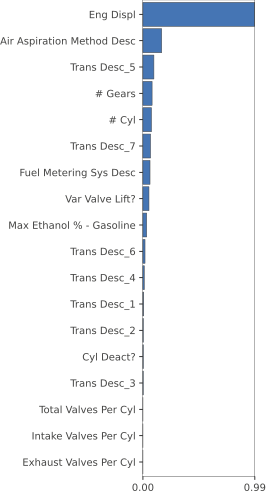

In [36]:
I = importances(rf_final, X_final, y_final)
plot_importances(I, color='#4575b4', vscale=1.8)

#### Question (5 marks)

Based on the feature importances, are any features that you think should be removed from the data set.  Why do you think these features should be removed? 

**Enter your answer here:**

<font color=darkblue>
    
* Eventhough Random Forest models are capable of ignoring least significant feature without much predictive power.<br>
    
* The rfpimp package specifically highlights the influence of each feature on the model accurately.<br>
    
* Hence, we can manually eliminate features that have least predictive power and further customize the model for better perfomance.<br>
    
* Also, removing the noisy features will help with memory, computational cost and the increase the accuracy of the model.<br>
    
* Certain categories inside the "Trans Desc " column proved to be least effective and can be removed. Also, we can see certain categories of the same column have significant predictive power.Ex: Trans Desc 5 and Trans Desc 7.<br>
    
* Intake and exhaust valves per cyl and Cyl Deact can also be removed as it contributes nothing to the entire model as it can be seen from the plot above.<br>
    
* With domain knoweldge certain features can be combined to increase the predictive power than it contributes independently.
    
<font/>